# **Tugas Crawling Berita**

0. crawling data dari berita online
1. ekstraksi kalimat dari berita online
2. bentuk tf-idf dari kalimat
3. bentuk cosinus similaritas dari langkah 2
4. bentuk dari langkah 3 suatu graph
5. hitung closeness centrality dari langkah 4

## **Crawling data Berita**

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv

crawling berita sport

In [ ]:
datas = []
berita_ke = 0
for page in range(1,21):
    url = f'https://indotimes.net/category/sport/page/{page}/'
    ge = req.get(url).text
    sop = bs(ge,'lxml')
    list_berita = sop.find('div',class_='jeg_inner_content')
    artikel = list_berita.find_all('article')
    print(f"============ anda berada di halaman {page}===================")
    for x in artikel:
        title = x.find('h3').text
        title = title.strip()
        link = x.find('h3').find('a')['href']
        ge_ = req.get(link).text
        sop_ = bs(ge_,'lxml')
        news = sop_.find_all('div', class_='entry-content no-share')
        berita_ke += 1
        print(f"================ Berita ke {berita_ke}=======================")
        print("Judul =", title)
        print("Link = ",link)
        print("Label = Olahraga")
        for x in news:
            news_full = ""
            paragraphs = x.find_all('p')
            for paragraph in paragraphs:
                news_full += paragraph.get_text()
            news_full = re.sub(r'[^\x00-\x7F]+', '', news_full)
            datas.append({
              'Judul': title,
              'Berita': news_full,
              'Label': 'Olahraga'
            })

crawling berita teknologi

In [ ]:
berita_ke = 0
for page in range(1,21):
    url = f'https://indotimes.net/category/teknologi/page/{page}/'
    ge = req.get(url).text
    sop = bs(ge,'lxml')
    list_berita = sop.find('div',class_='jeg_inner_content')
    artikel = list_berita.find_all('article')
    print(f"============ anda berada di halaman {page}===================")
    for x in artikel:
        title = x.find('h3').text
        title = title.strip()
        link = x.find('h3').find('a')['href']
        ge_ = req.get(link).text
        sop_ = bs(ge_,'lxml')
        news = sop_.find_all('div', class_='entry-content no-share')
        berita_ke += 1
        print(f"================ Berita ke {berita_ke}=======================")
        print("Judul =", title)
        print("Link = ",link)
        print("Label = Teknologi")
        for x in news:
            news_full = ""
            paragraphs = x.find_all('p')
            for paragraph in paragraphs:
                news_full += paragraph.get_text()
            news_full = re.sub(r'[^\x00-\x7F]+', '', news_full)
            datas.append({
              'Judul': title,
              'Berita': news_full,
              'Label': 'Teknologi'
            })

crawling berita entertaiment

In [ ]:
berita_ke = 0
for page in range(1,21):
    url = f'https://indotimes.net/category/entertainment/page/{page}/'
    ge = req.get(url).text
    sop = bs(ge,'lxml')
    list_berita = sop.find('div',class_='jeg_inner_content')
    artikel = list_berita.find_all('article')
    print(f"============ anda berada di halaman {page}===================")
    for x in artikel:
        title = x.find('h3').text
        title = title.strip()
        link = x.find('h3').find('a')['href']
        ge_ = req.get(link).text
        sop_ = bs(ge_,'lxml')
        news = sop_.find_all('div', class_='entry-content no-share')
        berita_ke += 1
        print(f"================ Berita ke {berita_ke}=======================")
        print("Judul =", title)
        print("Link = ",link)
        print("Label = Entertaiment")
        for x in news:
            news_full = ""
            paragraphs = x.find_all('p')
            for paragraph in paragraphs:
                news_full += paragraph.get_text()
            news_full = re.sub(r'[^\x00-\x7F]+', '', news_full)
            datas.append({
              'Judul': title,
              'Berita': news_full,
              'Label': 'Entertaiment'
            })

NameError: ignored

In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'data_berita.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Judul', 'Tanggal', 'Berita', 'Label']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datas:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_berita.csv


##  **Ekstraksi kalimat dari berita online**

In [1]:
import os

%cd /content/
os.mkdir('data_berita')

import gdown
# download data

nama_data = '/content/data_berita/data_berita.csv'
gdown.download(f'https://drive.google.com/uc?id=1vu67IeDIAWTCH9hk4C39DrH9JKXHpUVi', nama_data, quiet=False)

/content


Downloading...
From: https://drive.google.com/uc?id=1vu67IeDIAWTCH9hk4C39DrH9JKXHpUVi
To: /content/data_berita/data_berita.csv
100%|██████████| 2.30M/2.30M [00:00<00:00, 186MB/s]


'/content/data_berita/data_berita.csv'

In [2]:
import pandas as pd

data_berita = pd.read_csv('/content/data_berita/data_berita.csv')
data_berita

,Judul,Berita,Label
0,Orang Tua Luis Diaz Diculik: 2 Orang Penculik ...,"Orang tua Luis Diaz diculik di Kolombia, sebua...",Olahraga
1,Pertandingan AS Roma vs Monza Berakhir Tipis 1...,Pertandingan AS Roma vs Monza merupakan laga l...,Olahraga
2,Papu Gomez Positif Doping: 2 Tahun Larangan Be...,"Pemain sepak bola asal Argentina, Papu Gomez, ...",Olahraga
3,Hasil Denmark Open 2023: Saingan Fajar/Rian Be...,"Sebagai andalan utama ganda putra Indonesia, F...",Olahraga
4,"Akibat Benzema Dukung Palestina, Menteri Pranc...",Karim Benzema bakal mengajukan tuntutan hukum ...,Olahraga
...,...,...,...
595,Teaser Lagu Choi Yena “Hate Rodrigo” Tuai Krit...,Teaser lagu Choi Yena dengan judul Hate Rodrig...,Entertaiment
596,"Rilis MV “Move”, TREASURE Sub Unit T5 Resmi De...",TREASURE sub unit T5 akhirnya comeback dan lan...,Entertaiment
597,Ucapan Hari Raya Idul Adha: Menyambut Hari Kem...,"Hari Raya Idul Adha, juga dikenal sebagai Hari...",Entertaiment
598,Resmi! David Corenswet Ditunjuk Sebagai Pemera...,Warner Bros dan DC Studios telah menemukan pem...,Entertaiment


### **Normalisasi**

##### **Cek data kosong**

In [3]:
# cek apakah ada data yang kosong
data_berita.isnull().sum()

Judul     0
Berita    0
Label     0
dtype: int64

#### **Punctuation**

In [4]:
data_berita['berita_clean'] = data_berita['Berita'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()

#### **Memisah kalimat**

In [6]:
# import library dan download nltk
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
data_berita["tokenizing"] = data_berita['berita_clean'].apply(sent_tokenize)

In [7]:
data_berita

,Judul,Berita,Label,berita_clean,tokenizing
0,Orang Tua Luis Diaz Diculik: 2 Orang Penculik ...,"Orang tua Luis Diaz diculik di Kolombia, sebua...",Olahraga,"orang tua luis diaz diculik di kolombia, sebua...","[orang tua luis diaz diculik di kolombia, sebu..."
1,Pertandingan AS Roma vs Monza Berakhir Tipis 1...,Pertandingan AS Roma vs Monza merupakan laga l...,Olahraga,pertandingan as roma vs monza merupakan laga l...,[pertandingan as roma vs monza merupakan laga ...
2,Papu Gomez Positif Doping: 2 Tahun Larangan Be...,"Pemain sepak bola asal Argentina, Papu Gomez, ...",Olahraga,"pemain sepak bola asal argentina, papu gomez, ...","[pemain sepak bola asal argentina, papu gomez,..."
3,Hasil Denmark Open 2023: Saingan Fajar/Rian Be...,"Sebagai andalan utama ganda putra Indonesia, F...",Olahraga,"sebagai andalan utama ganda putra indonesia, f...","[sebagai andalan utama ganda putra indonesia, ..."
4,"Akibat Benzema Dukung Palestina, Menteri Pranc...",Karim Benzema bakal mengajukan tuntutan hukum ...,Olahraga,karim benzema bakal mengajukan tuntutan hukum ...,[karim benzema bakal mengajukan tuntutan hukum...
...,...,...,...,...,...
595,Teaser Lagu Choi Yena “Hate Rodrigo” Tuai Krit...,Teaser lagu Choi Yena dengan judul Hate Rodrig...,Entertaiment,teaser lagu choi yena dengan judul hate rodrig...,[teaser lagu choi yena dengan judul hate rodri...
596,"Rilis MV “Move”, TREASURE Sub Unit T5 Resmi De...",TREASURE sub unit T5 akhirnya comeback dan lan...,Entertaiment,treasure sub unit t5 akhirnya comeback dan lan...,[treasure sub unit t5 akhirnya comeback dan la...
597,Ucapan Hari Raya Idul Adha: Menyambut Hari Kem...,"Hari Raya Idul Adha, juga dikenal sebagai Hari...",Entertaiment,"hari raya idul adha, juga dikenal sebagai hari...","[hari raya idul adha, juga dikenal sebagai har..."
598,Resmi! David Corenswet Ditunjuk Sebagai Pemera...,Warner Bros dan DC Studios telah menemukan pem...,Entertaiment,warner bros dan dc studios telah menemukan pem...,[warner bros dan dc studios telah menemukan pe...


#### **TF-IDF per kalimat**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_results = []
set_len_doc = data_berita['tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(data_berita['tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #menyimpan hasil tf-idf

# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')
  arr_tfidf_results = tfidf_results[idoc].toarray()
  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [9]:
tfidf_results[0].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1606074 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.13440449],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22601133, 0.        , 0.22601133, ..., 0.        , 0.22601133,
        0.11104587],
       [0.        , 0.17655725, 0.        , ..., 0.        , 0.        ,
        0.09868732]])

#### **Cosinus Similarity**

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [11]:
cos_sim_result = []
graf_result = []
treshold = 0.11
for i_doc in range(len(tfidf_results)): #perulangan tiap dokumen
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  Graph = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menghitung cosine similarity

  for i_hasil in range(len(cos_sim)): #perulangan tiap kalimat dalam dokumen
    # graf_current =
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #iterasi pasangan kalimat
      if cos_sim[i_hasil][j_hasil] > treshold: #pengecekan hasil cosim apakah lebih dari treshold
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')
        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan hasil cosim
        Graph.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan graph

    cos_sim_now.append(arr_cosim)
    # Graph.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(Graph)
  # print('\n')

In [12]:
cos_sim_result[0]

[[[0, 2, 0.21188907500197962],
  [0, 3, 0.24171408786254103],
  [0, 6, 0.2283745215800414],
  [0, 10, 0.34633503901390505],
  [0, 16, 0.13155790541387738]],
 [],
 [[2, 8, 0.12989151189011594],
  [2, 15, 0.13758361060944985],
  [2, 19, 0.18050932510513854]],
 [[3, 10, 0.22396496974241695],
  [3, 14, 0.14040059723240012],
  [3, 18, 0.13603376643126946]],
 [[4, 12, 0.15019709153025618], [4, 14, 0.12863114962128103]],
 [[5, 13, 0.24748246734810556],
  [5, 15, 0.12443916028158729],
  [5, 18, 0.2621577624040739],
  [5, 19, 0.28052325350631596]],
 [[6, 10, 0.11211353103373717], [6, 14, 0.13170588542601377]],
 [[7, 16, 0.11654056393592296]],
 [[8, 15, 0.14821804880132847],
  [8, 16, 0.2489163026020488],
  [8, 18, 0.12237945580752352]],
 [[9, 16, 0.1507759713926225]],
 [],
 [[11, 13, 0.11878216092412264],
  [11, 18, 0.14384700429355782],
  [11, 19, 0.1379405361644424]],
 [[12, 14, 0.1689189294565031]],
 [[13, 15, 0.7024001876047026],
  [13, 16, 0.14296032021062902],
  [13, 17, 0.119503771518293

In [13]:
for i in range(len(cos_sim_result)): #iterasi dalam co_sim_result
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 1 : 15 = 0.2720321703996397
Cosine Similarity Kalimat 2 : 4 = 0.12613012515330674
Cosine Similarity Kalimat 2 : 9 = 0.36989346555355834
Cosine Similarity Kalimat 2 : 10 = 0.11871164994259956
Cosine Similarity Kalimat 2 : 18 = 0.12992370709613843
Cosine Similarity Kalimat 3 : 5 = 0.209561559757504
Cosine Similarity Kalimat 3 : 7 = 0.13875338826093653
Cosine Similarity Kalimat 3 : 16 = 0.14756441160056155
Cosine Similarity Kalimat 3 : 21 = 0.14170795681384163
Cosine Similarity Kalimat 4 : 7 = 0.12072153406732763
Cosine Similarity Kalimat 4 : 16 = 0.1484059991215328
Cosine Similarity Kalimat 5 : 7 = 0.15826521547691402
Cosine Similarity Kalimat 5 : 8 = 0.17885986524478154
Cosine Similarity Kalimat 5 : 12 = 0.11842178333940542
Cosine Similarity Kalimat 5 : 15 = 0.14487671044057954
Cosine Similarity Kalimat 5 : 16 = 0.1358567851580119
Cosine Similarity Kalimat 5 : 21 = 0.14673037657660687
Cosine Similarity Kalimat 

#### **Closness Centrality**

In [14]:
# import library untuk graph
import matplotlib.pyplot as plt

In [15]:
# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 2: 0.05555555555555555,
 3: 0.05555555555555555,
 6: 0.05555555555555555,
 10: 0.16666666666666666,
 16: 0.3232323232323232,
 8: 0.07407407407407407,
 15: 0.25,
 19: 0.39542483660130723,
 14: 0.2314814814814815,
 18: 0.37037037037037035,
 4: 0.0,
 12: 0.05555555555555555,
 5: 0.0,
 13: 0.1111111111111111,
 7: 0.0,
 9: 0.0,
 11: 0.0,
 17: 0.09999999999999999}

In [16]:
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_closeness

{19: 0.39542483660130723,
 18: 0.37037037037037035,
 16: 0.3232323232323232,
 15: 0.25,
 14: 0.2314814814814815,
 10: 0.16666666666666666,
 13: 0.1111111111111111,
 17: 0.09999999999999999,
 8: 0.07407407407407407,
 2: 0.05555555555555555,
 3: 0.05555555555555555,
 6: 0.05555555555555555,
 12: 0.05555555555555555,
 0: 0.0,
 4: 0.0,
 5: 0.0,
 7: 0.0,
 9: 0.0,
 11: 0.0}

In [17]:
kalimat_tertinggi = []

for i in range(3):
    max_key = None
    max_value = None

    for key, value in sorted_closeness.items():
      if key not in kalimat_tertinggi and (max_value is None or value > max_value):
          max_key = key
          max_value = value

    if max_key is not None:
        kalimat_tertinggi.append(max_key)

In [18]:
for i in kalimat_tertinggi:
  ringkasan = data_berita['tokenizing'][0][i]
  print(ringkasan)

liverpool dan para penggemarnya bersatu dalam doa agar diaz dan keluarganya mendapatkan kekuatan untuk melewati masa sulit ini dan semoga penculik yang tersisa dapat segera ditangkap dan dibawa ke pengadilan.
ini adalah kabar yang sangat menggembirakan dalam tragedi ini, meskipun diaz dan keluarganya masih akan membutuhkan dukungan dan waktu untuk pulih dari pengalaman mengerikan ini.
kabar terbaru menunjukkan bahwa ayah luis diaz telah berhasil diselamatkan oleh aparat keamanan kolombia.


In [19]:
data_berita['tokenizing'][0][19],data_berita['tokenizing'][0][18],data_berita['tokenizing'][0][16]

('liverpool dan para penggemarnya bersatu dalam doa agar diaz dan keluarganya mendapatkan kekuatan untuk melewati masa sulit ini dan semoga penculik yang tersisa dapat segera ditangkap dan dibawa ke pengadilan.',
 'ini adalah kabar yang sangat menggembirakan dalam tragedi ini, meskipun diaz dan keluarganya masih akan membutuhkan dukungan dan waktu untuk pulih dari pengalaman mengerikan ini.',
 'kabar terbaru menunjukkan bahwa ayah luis diaz telah berhasil diselamatkan oleh aparat keamanan kolombia.')

#### **Meringkas Semua data (Summerize)**

In [20]:
data_ringkasan_full = []
for i in range(len(graf_result)):
  # print(f'=========== Berita ke-{i}==========================')
  closeness_centrality_all = nx.closeness_centrality(graf_result[i])
  sorted_closeness_all = dict(sorted(closeness_centrality_all.items(), key=lambda item: item[1], reverse=True))
  # print(sorted_closeness_all)

  kalimat_tertinggi = []

  for x in range(3):
      max_key = None
      max_value = None

      for key, value in sorted_closeness_all.items():
        if key not in kalimat_tertinggi and (max_value is None or value > max_value):
            max_key = key
            max_value = value

      if max_key is not None:
          kalimat_tertinggi.append(max_key)
  # print(kalimat_tertinggi)
  data_ringkasan = []
  for j in kalimat_tertinggi:
    # print(j)
    ringkasan  = data_berita['tokenizing'][i][j]
    data_ringkasan.append(ringkasan)

  data_ringkasan_full.append(data_ringkasan)

data_ringkasan_full

[['liverpool dan para penggemarnya bersatu dalam doa agar diaz dan keluarganya mendapatkan kekuatan untuk melewati masa sulit ini dan semoga penculik yang tersisa dapat segera ditangkap dan dibawa ke pengadilan.',
  'ini adalah kabar yang sangat menggembirakan dalam tragedi ini, meskipun diaz dan keluarganya masih akan membutuhkan dukungan dan waktu untuk pulih dari pengalaman mengerikan ini.',
  'kabar terbaru menunjukkan bahwa ayah luis diaz telah berhasil diselamatkan oleh aparat keamanan kolombia.'],
 ['hasil akhir, as roma menang 10 atas monza.',
  'as roma akhirnya bisa memecah kebuntuan pada menit terakhir waktu normal alias menit ke90.',
  'ini merupakan kemenangan keempat armada jose mourinho yang membuat mereka naik ke peringkat keenam klasemen liga italia berbekal poin 14. dalam pertandingan ini, as roma menggunakan formasi 352, dengan rui patricio sebagai penjaga gawang.'],
 ['gomez juga berperan dalam keberhasilan sevilla memenangkan liga europa musim lalu, meskipun ia tid

In [21]:
data_ringkasan_to_df = []
for i in range(len(data_ringkasan_full)):
  ringkasan_text = " ".join(data_ringkasan_full[i])
  data_ringkasan_to_df.append({
      'Ringkasan': ringkasan_text,
      'Label': data_berita['Label'][i]})

data_ringkasan_df = pd.DataFrame(data_ringkasan_to_df)
data_ringkasan_df

,Ringkasan,Label
0,liverpool dan para penggemarnya bersatu dalam ...,Olahraga
1,"hasil akhir, as roma menang 10 atas monza. as ...",Olahraga
2,gomez juga berperan dalam keberhasilan sevilla...,Olahraga
3,pertandingan hasil denmark open 2023 akan berl...,Olahraga
4,"sebelumnya, pernyataan benzema dukung palestin...",Olahraga
...,...,...
595,beberapa unggahan tiktok choi yena yang menggu...,Entertaiment
596,!dari semua anggota treasure yang bergabung de...,Entertaiment
597,selamat hari raya idul adha! semoga ucapan har...,Entertaiment
598,karirnya di industri film dimulai pada 2018 de...,Entertaiment


In [22]:
data_ringkasan_df.to_csv('ringkasan_berita.csv', index=False)

## Preprocessing Data Ringkasan

In [1]:
import os

%cd /content/
os.mkdir('data_berita')

import gdown
# download data

nama_data = '/content/data_berita/data_ringkasan.csv'
gdown.download(f'https://drive.google.com/uc?id=1UQ-p6bQYPdH3KzJdqn9YEgH84tZafsv1', nama_data, quiet=False)

/content


Downloading...
From: https://drive.google.com/uc?id=1UQ-p6bQYPdH3KzJdqn9YEgH84tZafsv1
To: /content/data_berita/data_ringkasan.csv
100%|██████████| 257k/257k [00:00<00:00, 93.5MB/s]


'/content/data_berita/data_ringkasan.csv'

In [2]:
import pandas as pd

data_ringkasan = pd.read_csv('/content/data_berita/data_ringkasan.csv')
data_ringkasan

,Ringkasan,Label
0,liverpool dan para penggemarnya bersatu dalam ...,Olahraga
1,"hasil akhir, as roma menang 10 atas monza. as ...",Olahraga
2,gomez juga berperan dalam keberhasilan sevilla...,Olahraga
3,pertandingan hasil denmark open 2023 akan berl...,Olahraga
4,"sebelumnya, pernyataan benzema dukung palestin...",Olahraga
...,...,...
595,beberapa unggahan tiktok choi yena yang menggu...,Entertaiment
596,!dari semua anggota treasure yang bergabung de...,Entertaiment
597,selamat hari raya idul adha! semoga ucapan har...,Entertaiment
598,karirnya di industri film dimulai pada 2018 de...,Entertaiment


#### **Cleaning data**

In [3]:
data_ringkasan.isnull().sum()

Ringkasan    0
Label        0
dtype: int64

#### **Punctuation**

In [4]:
import string

data_ringkasan['ringkasan_punctuation'] = data_ringkasan['Ringkasan'].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Menghilangkan angka dari kolom 'new_abstrak'
data_ringkasan['ringkasan_punctuation'] = data_ringkasan['ringkasan_punctuation'].str.replace('\d+', '', regex=True)

data_ringkasan

,Ringkasan,Label,ringkasan_punctuation
0,liverpool dan para penggemarnya bersatu dalam ...,Olahraga,liverpool dan para penggemarnya bersatu dalam ...
1,"hasil akhir, as roma menang 10 atas monza. as ...",Olahraga,hasil akhir as roma menang atas monza as roma...
2,gomez juga berperan dalam keberhasilan sevilla...,Olahraga,gomez juga berperan dalam keberhasilan sevilla...
3,pertandingan hasil denmark open 2023 akan berl...,Olahraga,pertandingan hasil denmark open akan berlangs...
4,"sebelumnya, pernyataan benzema dukung palestin...",Olahraga,sebelumnya pernyataan benzema dukung palestina...
...,...,...,...
595,beberapa unggahan tiktok choi yena yang menggu...,Entertaiment,beberapa unggahan tiktok choi yena yang menggu...
596,!dari semua anggota treasure yang bergabung de...,Entertaiment,dari semua anggota treasure yang bergabung den...
597,selamat hari raya idul adha! semoga ucapan har...,Entertaiment,selamat hari raya idul adha semoga ucapan hari...
598,karirnya di industri film dimulai pada 2018 de...,Entertaiment,karirnya di industri film dimulai pada dengan...


#### **Stopword**

In [9]:
# import library dan download nltk
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words di luar loop
# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    if isinstance(text, str):  # Periksa apakah teks adalah string
        return ' '.join(word for word in text.split() if word not in stop_words)
    else:
        return ''  # Mengembalikan string kosong untuk nilai non-string

data_ringkasan['ringkasan_Stopword'] = data_ringkasan['ringkasan_punctuation'].apply(remove_stopwords)
data_ringkasan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Ringkasan,Label,ringkasan_punctuation,ringkasan_Stopword
0,liverpool dan para penggemarnya bersatu dalam ...,Olahraga,liverpool dan para penggemarnya bersatu dalam ...,liverpool penggemarnya bersatu doa diaz keluar...
1,"hasil akhir, as roma menang 10 atas monza. as ...",Olahraga,hasil akhir as roma menang atas monza as roma...,hasil as roma menang monza as roma memecah keb...
2,gomez juga berperan dalam keberhasilan sevilla...,Olahraga,gomez juga berperan dalam keberhasilan sevilla...,gomez berperan keberhasilan sevilla memenangka...
3,pertandingan hasil denmark open 2023 akan berl...,Olahraga,pertandingan hasil denmark open akan berlangs...,pertandingan hasil denmark open jumat fajarria...
4,"sebelumnya, pernyataan benzema dukung palestin...",Olahraga,sebelumnya pernyataan benzema dukung palestina...,pernyataan benzema dukung palestina tweet apli...
...,...,...,...,...
595,beberapa unggahan tiktok choi yena yang menggu...,Entertaiment,beberapa unggahan tiktok choi yena yang menggu...,unggahan tiktok choi yena tagar hate_rodrigo d...
596,!dari semua anggota treasure yang bergabung de...,Entertaiment,dari semua anggota treasure yang bergabung den...,anggota treasure bergabung mv lagu junkyu bagu...
597,selamat hari raya idul adha! semoga ucapan har...,Entertaiment,selamat hari raya idul adha semoga ucapan hari...,selamat raya idul adha semoga ucapan raya idul...
598,karirnya di industri film dimulai pada 2018 de...,Entertaiment,karirnya di industri film dimulai pada dengan...,karirnya industri film peran utama affairs of ...


In [11]:
# data_ringkasan = data_ringkasan.drop(['Abstrak_Stopword'], axis=1)

#### **Tokenizing**

In [12]:
data_ringkasan["tokenizing"] = data_ringkasan['ringkasan_Stopword'].apply(sent_tokenize)

In [13]:
data_ringkasan

,Ringkasan,Label,ringkasan_punctuation,ringkasan_Stopword,tokenizing
0,liverpool dan para penggemarnya bersatu dalam ...,Olahraga,liverpool dan para penggemarnya bersatu dalam ...,liverpool penggemarnya bersatu doa diaz keluar...,[liverpool penggemarnya bersatu doa diaz kelua...
1,"hasil akhir, as roma menang 10 atas monza. as ...",Olahraga,hasil akhir as roma menang atas monza as roma...,hasil as roma menang monza as roma memecah keb...,[hasil as roma menang monza as roma memecah ke...
2,gomez juga berperan dalam keberhasilan sevilla...,Olahraga,gomez juga berperan dalam keberhasilan sevilla...,gomez berperan keberhasilan sevilla memenangka...,[gomez berperan keberhasilan sevilla memenangk...
3,pertandingan hasil denmark open 2023 akan berl...,Olahraga,pertandingan hasil denmark open akan berlangs...,pertandingan hasil denmark open jumat fajarria...,[pertandingan hasil denmark open jumat fajarri...
4,"sebelumnya, pernyataan benzema dukung palestin...",Olahraga,sebelumnya pernyataan benzema dukung palestina...,pernyataan benzema dukung palestina tweet apli...,[pernyataan benzema dukung palestina tweet apl...
...,...,...,...,...,...
595,beberapa unggahan tiktok choi yena yang menggu...,Entertaiment,beberapa unggahan tiktok choi yena yang menggu...,unggahan tiktok choi yena tagar hate_rodrigo d...,[unggahan tiktok choi yena tagar hate_rodrigo ...
596,!dari semua anggota treasure yang bergabung de...,Entertaiment,dari semua anggota treasure yang bergabung den...,anggota treasure bergabung mv lagu junkyu bagu...,[anggota treasure bergabung mv lagu junkyu bag...
597,selamat hari raya idul adha! semoga ucapan har...,Entertaiment,selamat hari raya idul adha semoga ucapan hari...,selamat raya idul adha semoga ucapan raya idul...,[selamat raya idul adha semoga ucapan raya idu...
598,karirnya di industri film dimulai pada 2018 de...,Entertaiment,karirnya di industri film dimulai pada dengan...,karirnya industri film peran utama affairs of ...,[karirnya industri film peran utama affairs of...


#### **TF-IDF DATA RINGKASAN**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_ringkasan_text = data_ringkasan['tokenizing'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data_ringkasan_text).toarray()
terms = tfidf_vectorizer.get_feature_names_out()

data_ringkasan_tfidf = pd.DataFrame(tfidf_matrix, columns=terms)
data_ringkasan_tfidf.insert(0, 'Ringkasan', data_ringkasan_text)

data_ringkasan_tfidf

,Ringkasan,aang,aaron,abadi,abby,abde,abdel,abdillah,abdulrahman,abel,...,zombieverse,zona,zoom,zoosk,zootopia,zoro,zou,zuko,zusril,zverev
0,liverpool penggemarnya bersatu doa diaz keluar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hasil as roma menang monza as roma memecah keb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gomez berperan keberhasilan sevilla memenangka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pertandingan hasil denmark open jumat fajarria...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,pernyataan benzema dukung palestina tweet apli...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,unggahan tiktok choi yena tagar hate_rodrigo d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,anggota treasure bergabung mv lagu junkyu bagu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,selamat raya idul adha semoga ucapan raya idul...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,karirnya industri film peran utama affairs of ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Menggabung TF-IDF dengan Label**

In [15]:
tfidf_label = pd.concat([data_ringkasan_tfidf,data_ringkasan['Label']],axis=1)
tfidf_label

,Ringkasan,aang,aaron,abadi,abby,abde,abdel,abdillah,abdulrahman,abel,...,zona,zoom,zoosk,zootopia,zoro,zou,zuko,zusril,zverev,Label
0,liverpool penggemarnya bersatu doa diaz keluar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
1,hasil as roma menang monza as roma memecah keb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
2,gomez berperan keberhasilan sevilla memenangka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
3,pertandingan hasil denmark open jumat fajarria...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
4,pernyataan benzema dukung palestina tweet apli...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,unggahan tiktok choi yena tagar hate_rodrigo d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertaiment
596,anggota treasure bergabung mv lagu junkyu bagu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertaiment
597,selamat raya idul adha semoga ucapan raya idul...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertaiment
598,karirnya industri film peran utama affairs of ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertaiment


## **Modeling**

### **Naive Bayes**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [24]:
x = tfidf_label.iloc[:, 1:-1]
y = tfidf_label.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy_naiveBayes = accuracy_score(y_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.9083333333333333


### **KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_train, y_train)

# Lakukan prediksi
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.8916666666666667


### **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_train, y_train)

# Lakukan prediksi
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.9083333333333333


## **Evaluasi Model**

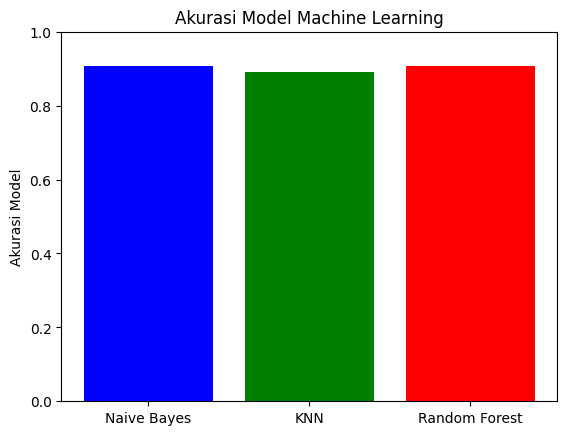

In [27]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'KNN', 'Random Forest']
accuracies = [accuracy_naiveBayes, accuracy_knn, accuracy_rf]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()